In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Naive Bayes Classifiers:**

- A family of classifiers that are quite similar to linear models.

    - Faster to train but slightly worse perfomance.

- **Three main kinds:**

    - Gaussian Naive Bayes: Can be applied to any continuous data.

    - Bernoulli Naive Bayes: Assumes binary data.
    
    - Multinomial Naive Bayes: Assumes count data, i.e. each feature is a count of something.


### Gaussian Naive Bayes:
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

- $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

In [2]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = load_iris() # We already know it
# Splittind data on equal parts for training and testing
X_train, X_test, y_train, y_test = train_test_split(
                                    data.data, data.target, 
                                    random_state=0, 
                                    test_size=0.5)
# Instanciyng
gnb = GaussianNB()

# Train and fit
# *Chaining method: traind and predict on the same line 
y_pred = gnb.fit(X_train, y_train).predict(X_test)


Observe how many datapoints were mislabeled.

In [3]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [4]:
print('Number of mislabeled points out of a total {} points: {}.'
      .format(len(X_test), (y_pred != y_test).sum()))
print(f'Score: {gnb.score(X_test, y_test)}')

Number of mislabeled points out of a total 75 points: 4.
Score: 0.9466666666666667


¡! Important to notice that score here is the simple ratio of correctly labeled.

***

# **Decision Trees**

- Widely used for classification and regression tasks.

- Collection of if/no question patterns that leads to a decision (The prediction). Each question is called "test", and the algorithm searches the most informative test to come up whith a preddciont efficiently.

- Tests can be seen as partitions of the data that best label each datapoint.

- Can easily overfit if complexity is not controlled.

#### Strategies to prevent overfitting

- Pre-pruning: early stopping of the creation of the tree.
    - Limiting the max depth (How many levels). - `max_depth`
    - Limiting the number of leaves. `max_leaf_nodes`
    - Requiring a minimum number of points to keep splitting. `min_samples_split`

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=42, stratify=cancer.target)

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Let's apply pre-pruning. This dicreases complexity and overfitting, which leads to an improvement on performance.

In [6]:
# adjusting max_depth
tree4d = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4d.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree4d.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree4d.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


**Analysing and visualizing.**

We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled:

In [7]:
from sklearn.tree import export_graphviz
# The function creates the graphic into a file
export_graphviz(tree4d, out_file='tree.dot',
                feature_names=cancer['feature_names'],
                class_names=['Malignant', 'Benign'],
                filled=True, # Paint nodes
                impurity=False)

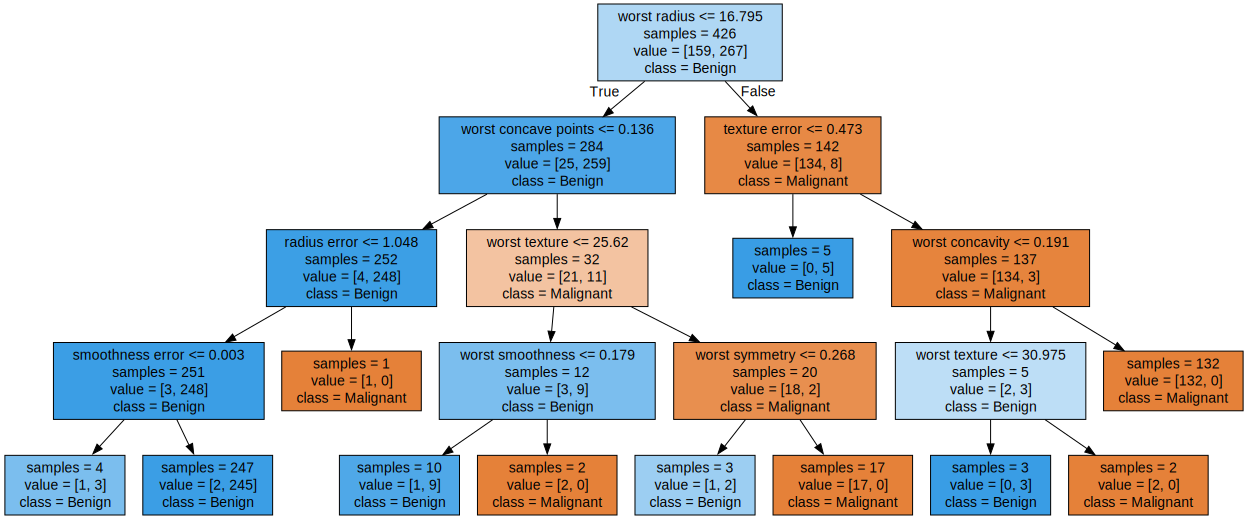

In [9]:
# Module to visualize .dot files
import graphviz 

with open('assets/tree.dot', 'r') as file:
    graph = file.read()
graphviz.Source(graph)

# They already implement a function:
# from sklearn.trees import plot_tree
# plot_tree(tree4d)

**Feature importance**

In [10]:
tree4d.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

Text(0, 0.5, 'Feature')

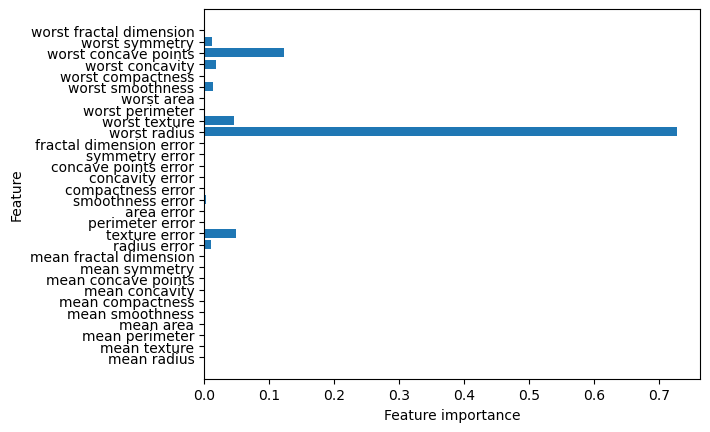

In [11]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree4d.feature_importances_, align='center')
# Ticks are the markers denoting data points on the axes
plt.yticks(np.arange(n_features), cancer.feature_names) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")